In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


ctrain1 = np.load('ctrain.npy')
ctest1 = np.load('ctest.npy')
seed_data1 = np.load('seed_data.npy')



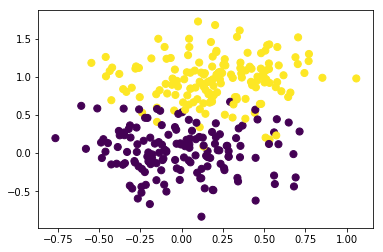

In [3]:
%matplotlib inline
#1: examining scattorplot of 2d ctrain marked by class; I can definitely see 
#the class boundry. The classes aren't seperable, I think Bayes classifier
#will often have errors due to the nature of its calculations


plt.scatter(ctrain1[:,0],ctrain1[:,1], s = 50, c = ctrain1[:,2])

In [4]:
#2 fit a naive bayes classifier

ctrain= ctrain1[:,:3]
X = ctrain1[:,:2]
y = ctrain1[:,2]
xt = ctest1[:,:2]
yt = ctest1[:,2]
model = GaussianNB()
model.fit(X, y);

y_pred = model.predict(X)


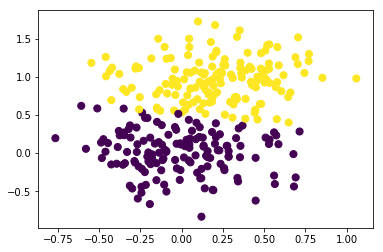

In [5]:
#3 2d scatterplot of observations marked by class
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50,);

In [6]:
#4 calculate precision, recall and receiver operating curve for my NB classifier
target_names = ['class 0', 'class 1',]
print(classification_report(y, y_pred, target_names=target_names))

fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)

print(fpr,"\n",tpr,"\n",thresholds)

             precision    recall  f1-score   support

    class 0       0.95      0.94      0.95       150
    class 1       0.94      0.95      0.95       150

avg / total       0.95      0.95      0.95       300

[0.   0.06 1.  ] 
 [0.         0.95333333 1.        ] 
 [2. 1. 0.]


             precision    recall  f1-score   support

    class 0       0.97      0.95      0.96       150
    class 1       0.95      0.97      0.96       150

avg / total       0.96      0.96      0.96       300

[0.         0.56666667 1.        ] 
 [0.         0.44666667 1.        ] 
 [2. 1. 0.]


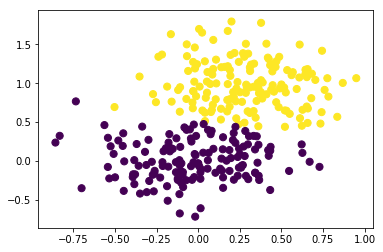

In [7]:
#5 apply NB classifier to ctest
#plt.scatter(xt[:, 0], xt[:, 1], c=y, s=50,);
#The results are a little different 
#then the training data results but almost the same. 
model.fit(xt, yt);

yt_pred = model.predict(xt)
plt.scatter(xt[:, 0], xt[:, 1], c=yt_pred, s=50,);

print(classification_report(yt, yt_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y, yt_pred, pos_label=1)
print(fpr,"\n",tpr,"\n",thresholds)

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00       150
    class 1       1.00      1.00      1.00       150

avg / total       1.00      1.00      1.00       300

[0. 1.] 
 [1. 1.] 
 [1. 0.]


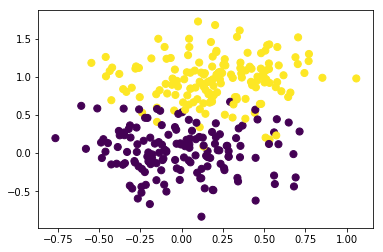

In [8]:
#6 fit k-nearest niehgbor classifier on ctrain with k = 1

neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh7 = KNeighborsClassifier(n_neighbors=7)

neigh1.fit(X,y);

y1_pred = neigh1.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y1_pred, s=50,);


print(classification_report(y, y1_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y, y1_pred, pos_label=1)
print(fpr,"\n",tpr,"\n",thresholds)


             precision    recall  f1-score   support

    class 0       0.95      0.97      0.96       150
    class 1       0.97      0.95      0.96       150

avg / total       0.96      0.96      0.96       300

[0.         0.02666667 1.        ] 
 [0.         0.94666667 1.        ] 
 [2. 1. 0.]


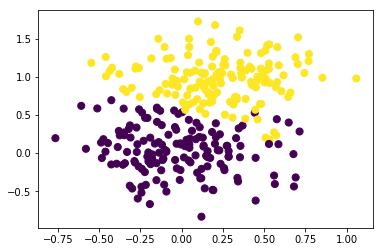

In [9]:
#6 k-nearest niehgbor classifier on ctrain with k = 3
neigh3.fit(X,y);
y2_pred = neigh3.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y2_pred, s=50,);


print(classification_report(y, y2_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y, y2_pred, pos_label=1)
print(fpr,"\n",tpr,"\n",thresholds)

             precision    recall  f1-score   support

    class 0       0.94      0.97      0.95       150
    class 1       0.97      0.93      0.95       150

avg / total       0.95      0.95      0.95       300

[0.         0.02666667 1.        ] 
 [0.         0.93333333 1.        ] 
 [2. 1. 0.]


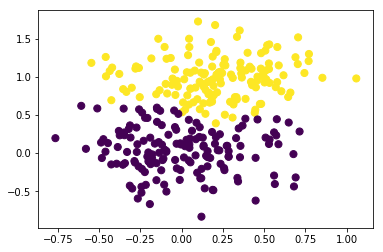

In [10]:
#6 k-nearest niehgbor classifier on ctrain with k = 7
neigh7.fit(X,y);
y3_pred = neigh7.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y3_pred, s=50,);


print(classification_report(y, y3_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y, y3_pred, pos_label=1)
print(fpr,"\n",tpr,"\n",thresholds)

In [11]:
#7 comparing the k-nearest classifier scores I observed that k = 1 had the best 
#performance and decreased as k increased

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00       150
    class 1       1.00      1.00      1.00       150

avg / total       1.00      1.00      1.00       300



array([[150,   0],
       [  0, 150]], dtype=int64)

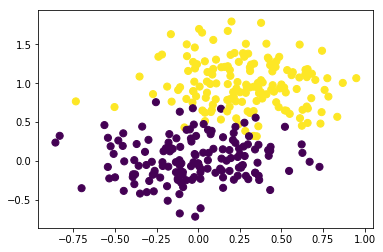

In [12]:
#8 fit k-nearest niehgbor classifier on ctest with k = 1

neigh1.fit(xt,yt);

yt1_pred = neigh1.predict(xt)
plt.scatter(xt[:, 0], xt[:, 1], c=yt1_pred, s=50,);


print(classification_report(yt, yt1_pred, target_names=target_names))
confusion_matrix(yt, yt1_pred)

             precision    recall  f1-score   support

    class 0       0.97      0.95      0.96       150
    class 1       0.95      0.97      0.96       150

avg / total       0.96      0.96      0.96       300



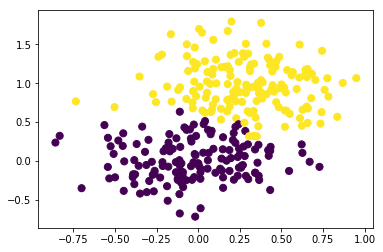

In [13]:
#8 k = 3

neigh3.fit(xt,yt);

yt2_pred = neigh3.predict(xt)
plt.scatter(xt[:, 0], xt[:, 1], c=yt2_pred, s=50,);


print(classification_report(yt, yt2_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.98      0.95      0.96       150
    class 1       0.95      0.98      0.96       150

avg / total       0.96      0.96      0.96       300



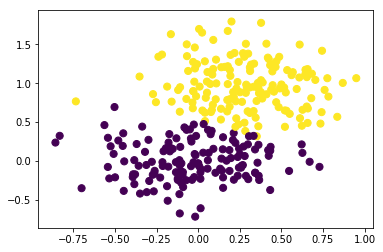

In [14]:
#8 k = 7
#Seems like the results are quite similar 

neigh7.fit(xt,yt);

yt3_pred = neigh7.predict(xt)
plt.scatter(xt[:, 0], xt[:, 1], c=yt3_pred, s=50,);


print(classification_report(yt, yt3_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00       150
    class 1       1.00      1.00      1.00       150

avg / total       1.00      1.00      1.00       300

[0. 1.] 
 [1. 1.] 
 [1. 0.]


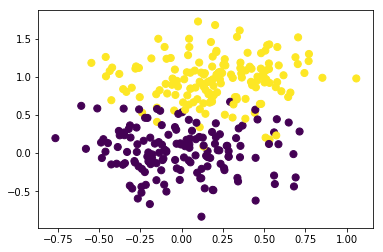

In [15]:
#9 fit dtc with depth 3 
clf = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier(max_depth=3)

clf.fit(X,y);
ydtc_pred = clf.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ydtc_pred, s=50,);


print(classification_report(y, ydtc_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y, ydtc_pred, pos_label=1)
print(fpr,"\n",tpr,"\n",thresholds)

             precision    recall  f1-score   support

    class 0       0.97      0.93      0.95       150
    class 1       0.94      0.97      0.95       150

avg / total       0.95      0.95      0.95       300

[0.         0.06666667 1.        ] 
 [0.         0.96666667 1.        ] 
 [2. 1. 0.]


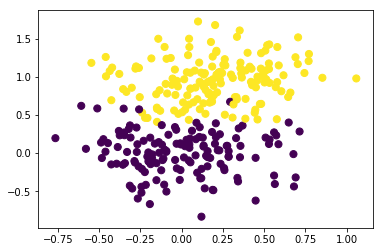

In [16]:
#9 DTC with max_depth = 3


clf2.fit(X,y);
ydtc2_pred = clf2.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ydtc2_pred, s=50,);


print(classification_report(y, ydtc2_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y, ydtc2_pred, pos_label=1)
print(fpr,"\n",tpr,"\n",thresholds)

In [17]:
#10 upon comparing the scores from the two DTC's I'd have to say that increasing 
#the maxdepth to 3 resulted in lower performance than no max depth.

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00       150
    class 1       1.00      1.00      1.00       150

avg / total       1.00      1.00      1.00       300

[0.         0.57333333 1.        ] 
 [0.         0.42666667 1.        ] 
 [2. 1. 0.]


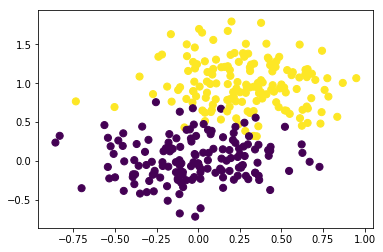

In [18]:
#11 dtc tests on ctest with no max depth 

clf.fit(xt,yt);
ytdtc_pred = clf.predict(xt)
plt.scatter(xt[:, 0], xt[:, 1], c=ytdtc_pred, s=50,);


print(classification_report(yt, ytdtc_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y, ytdtc_pred, pos_label=1)
print(fpr,"\n",tpr,"\n",thresholds)

             precision    recall  f1-score   support

    class 0       0.97      0.97      0.97       150
    class 1       0.97      0.97      0.97       150

avg / total       0.97      0.97      0.97       300

[0.         0.56666667 1.        ] 
 [0.   0.44 1.  ] 
 [2. 1. 0.]


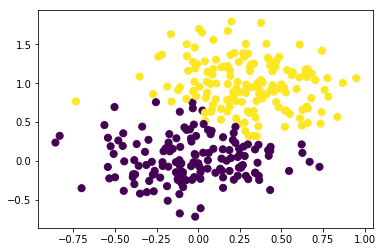

In [19]:
#11 dtc tests on ctest with max depth of 3
#seems like the same results as last time, max depth of 3lowered the peformance

clf2.fit(xt,yt);
ytdtc2_pred = clf2.predict(xt)
plt.scatter(xt[:, 0], xt[:, 1], c=ytdtc2_pred, s=50,);


print(classification_report(yt, ytdtc2_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(y, ytdtc2_pred, pos_label=1)
print(fpr,"\n",tpr,"\n",thresholds)


In [20]:
#12 GaussianNB on seed data

sX = seed_data1[:,:7]
sy = seed_data1[:,7]
model = GaussianNB()
model.fit(sX, sy);

sy_pred = model.predict(sX)

target_namess = ['class 0', 'class 1','class 2',]
print(classification_report(sy, sy_pred, target_names=target_namess))
confusion_matrix(sy, sy_pred)

             precision    recall  f1-score   support

    class 0       0.88      0.84      0.86        70
    class 1       0.96      0.93      0.94        70
    class 2       0.89      0.96      0.92        70

avg / total       0.91      0.91      0.91       210



array([[59,  3,  8],
       [ 5, 65,  0],
       [ 3,  0, 67]], dtype=int64)

In [21]:
#12 kNN with k = 3 on seed data

sX = seed_data1[:,:7]
sy = seed_data1[:,7]

neigh3.fit(sX, sy);

sy1_pred = neigh3.predict(sX)

target_namess = ['class 0', 'class 1','class 2',]
print(classification_report(sy, sy1_pred, target_names=target_namess))
confusion_matrix(sy, sy1_pred)

             precision    recall  f1-score   support

    class 0       0.97      0.93      0.95        70
    class 1       1.00      0.97      0.99        70
    class 2       0.93      1.00      0.97        70

avg / total       0.97      0.97      0.97       210



array([[65,  0,  5],
       [ 2, 68,  0],
       [ 0,  0, 70]], dtype=int64)

In [22]:
#12 kNN with k = 7 on seed data

sX = seed_data1[:,:7]
sy = seed_data1[:,7]

neigh7.fit(sX, sy);

sy2_pred = neigh7.predict(sX)

target_namess = ['class 0', 'class 1','class 2',]
print(classification_report(sy, sy2_pred, target_names=target_namess))
confusion_matrix(sy, sy2_pred)

             precision    recall  f1-score   support

    class 0       0.92      0.83      0.87        70
    class 1       0.96      0.96      0.96        70
    class 2       0.88      0.97      0.93        70

avg / total       0.92      0.92      0.92       210



array([[58,  3,  9],
       [ 3, 67,  0],
       [ 2,  0, 68]], dtype=int64)

In [23]:
#12 dtc on seed data with max depth 3

clf2.fit(sX,sy);
sydtc_pred = clf2.predict(sX)


print(classification_report(sy, sydtc_pred, target_names=target_namess))
confusion_matrix(sy, sydtc_pred)

             precision    recall  f1-score   support

    class 0       0.95      0.90      0.93        70
    class 1       1.00      0.97      0.99        70
    class 2       0.91      0.99      0.95        70

avg / total       0.95      0.95      0.95       210



array([[63,  0,  7],
       [ 2, 68,  0],
       [ 1,  0, 69]], dtype=int64)

In [24]:
#12 dtc on seed data with max depth 2
clf3 = DecisionTreeClassifier(max_depth=2)
clf3.fit(sX,sy);
sydtc2_pred = clf3.predict(sX)


print(classification_report(sy, sydtc2_pred, target_names=target_namess))
confusion_matrix(sy, sydtc2_pred)

             precision    recall  f1-score   support

    class 0       0.96      0.79      0.87        70
    class 1       0.99      0.97      0.98        70
    class 2       0.83      1.00      0.91        70

avg / total       0.93      0.92      0.92       210



array([[55,  1, 14],
       [ 2, 68,  0],
       [ 0,  0, 70]], dtype=int64)

In [25]:
#12 of all classifiers kNN with k = 3 performed the best
#and the naive bayes was the worst

In [26]:
#after using the confusion matrix on the seeds data set I came to the conclusion
#that I the kNN with k =3 would hold up on new test data.
#due to the fact that it performed high on both datasets. I'm also guessing that  
#this was perfectly reflected in the confusion matrix by the diagonal numbers being surround
#by zeros or lack of errors.